In [ ]:
!pip install networkx[all]
!pip install swifter

In [2]:
from networkx import Graph
import networkx as nx
import pandas as pd
import matplotlib.pyplot as pt
import itertools
import ast
import swifter

%matplotlib inline
import warnings; warnings.simplefilter('ignore')

# B. Load Data

In [3]:
data_dir = '/content/drive/MyDrive/Gemastik21/results/dominant_topic_resuls.csv'
topic_df = pd.read_csv(data_dir)

In [4]:
topic_df.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4812,"trading, elon_musk, elon, saldo, musk, matic, ...","['hold', 'keras', 'anjing', 'sayang', 'dijualin']"
1,1,4.0,0.2680,"terima_kasih, menang, andbismillah, wish_luck,...","['ajak', 'generasi', 'milenial', 'khusus', 'in..."
2,2,5.0,0.7155,"trading, card, crypto, andtg, kar, pc, album, ...","['rt', 'mncsekuritas', 'mnc', 'sekuritas', 'ti..."
3,3,1.0,0.8609,"crypto, trading, main, saham, beli, bitcoin, a...","['kitadua', 'karyawan', 'enak', 'swing', 'trad..."
4,4,0.0,0.9690,"bitcoin, crypto, eth, btc, uang, cryptocurrenc...","['songoldfx', 'jasa', 'konsultasi', 'forex', '..."


In [5]:
test = topic_df.Text[0]
test

"['hold', 'keras', 'anjing', 'sayang', 'dijualin']"

In [6]:
def textConvertion(text:str):
    """
    convert string containing list into list then join the text
    """
    text = ast.literal_eval(text)
    text = ' '.join(text)
    # remove extra spaces
    text = " ".join(text.split())
    return text

In [7]:
test = textConvertion(test)
test

'hold keras anjing sayang dijualin'

In [8]:
topic_df['clean_sentence'] = topic_df['Text'].swifter.apply(textConvertion)
topic_df['clean_sentence'].head()

0                    hold keras anjing sayang dijualin
1    ajak generasi milenial khusus indonesia tradin...
2    rt mncsekuritas mnc sekuritas tingkat forma pl...
3                  kitadua karyawan enak swing trading
4    songoldfx jasa konsultasi forex trading produk...
Name: clean_sentence, dtype: object

In [ ]:
topic_df

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,clean_sentence
0,0,2.0,0.4812,"trading, elon_musk, elon, saldo, musk, matic, ...","['hold', 'keras', 'anjing', 'sayang', 'dijualin']",hold keras anjing sayang dijualin
1,1,4.0,0.2680,"terima_kasih, menang, andbismillah, wish_luck,...","['ajak', 'generasi', 'milenial', 'khusus', 'in...",ajak generasi milenial khusus indonesia tradin...
2,2,5.0,0.7155,"trading, card, crypto, andtg, kar, pc, album, ...","['rt', 'mncsekuritas', 'mnc', 'sekuritas', 'ti...",rt mncsekuritas mnc sekuritas tingkat forma pl...
3,3,1.0,0.8609,"crypto, trading, main, saham, beli, bitcoin, a...","['kitadua', 'karyawan', 'enak', 'swing', 'trad...",kitadua karyawan enak swing trading
4,4,0.0,0.9690,"bitcoin, crypto, eth, btc, uang, cryptocurrenc...","['songoldfx', 'jasa', 'konsultasi', 'forex', '...",songoldfx jasa konsultasi forex trading produk...
...,...,...,...,...,...,...
72578,72578,4.0,0.5833,"terima_kasih, menang, andbismillah, wish_luck,...",['andbismillah'],andbismillah
72579,72579,0.0,0.5410,"bitcoin, crypto, eth, btc, uang, cryptocurrenc...","['tawar', 'gedor', 'dm']",tawar gedor dm
72580,72580,3.0,0.5833,"crypto, bitcoin, harga, koin, pakai, wallet, t...",['karya'],karya
72581,72581,2.0,0.5833,"trading, elon_musk, elon, saldo, musk, matic, ...",['andazerbaijan'],andazerbaijan


In [ ]:
topic_df.to_csv('/content/drive/MyDrive/Gemastik21/tna-data/topic-models.csv', index=False)

# Load Topic DF


In [9]:
topic_df = pd.read_csv('/content/drive/MyDrive/Gemastik21/tna-data/topic-models.csv')

In [10]:
topic_df.Dominant_Topic[0]

2.0

In [11]:
topic_df['Dominant_Topic'] = topic_df['Dominant_Topic'].swifter.apply(lambda x: int(x))
topic_df.head(7)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,clean_sentence
0,0,2,0.4812,"trading, elon_musk, elon, saldo, musk, matic, ...","['hold', 'keras', 'anjing', 'sayang', 'dijualin']",hold keras anjing sayang dijualin
1,1,4,0.2680,"terima_kasih, menang, andbismillah, wish_luck,...","['ajak', 'generasi', 'milenial', 'khusus', 'in...",ajak generasi milenial khusus indonesia tradin...
2,2,5,0.7155,"trading, card, crypto, andtg, kar, pc, album, ...","['rt', 'mncsekuritas', 'mnc', 'sekuritas', 'ti...",rt mncsekuritas mnc sekuritas tingkat forma pl...
3,3,1,0.8609,"crypto, trading, main, saham, beli, bitcoin, a...","['kitadua', 'karyawan', 'enak', 'swing', 'trad...",kitadua karyawan enak swing trading
4,4,0,0.9690,"bitcoin, crypto, eth, btc, uang, cryptocurrenc...","['songoldfx', 'jasa', 'konsultasi', 'forex', '...",songoldfx jasa konsultasi forex trading produk...
5,5,2,0.5455,"trading, elon_musk, elon, saldo, musk, matic, ...","['pandemi', 'dapur', 'ngebul', 'autopilot', 't...",pandemi dapur ngebul autopilot trading valas
6,6,1,0.9603,"crypto, trading, main, saham, beli, bitcoin, a...","['tradeworks', 'strategi', 'trading', 'program...",tradeworks strategi trading programming indika...


In [12]:
# function to create specific dataframe based on certain conditions

def make_spec_df(df, column_name, value):
  new_df = df.loc[df[column_name] == value ]
  return new_df.reset_index(drop=True)

In [13]:
topic0 = make_spec_df(topic_df, 'Dominant_Topic', 0)

In [14]:
topic0.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,clean_sentence
0,4,0,0.9690,"bitcoin, crypto, eth, btc, uang, cryptocurrenc...","['songoldfx', 'jasa', 'konsultasi', 'forex', '...",songoldfx jasa konsultasi forex trading produk...
1,9,0,0.9402,"bitcoin, crypto, eth, btc, uang, cryptocurrenc...","['rp', 'investasi', 'trading', 'bitcoin', 'ind...",rp investasi trading bitcoin indonesia referra...
2,16,0,0.6938,"bitcoin, crypto, eth, btc, uang, cryptocurrenc...","['morning', 'tl', 'penuh', 'bitcoin', 'gugat',...",morning tl penuh bitcoin gugat takut fomo jer
3,17,0,0.7215,"bitcoin, crypto, eth, btc, uang, cryptocurrenc...","['btc', 'eth']",btc eth
4,25,0,0.1667,"bitcoin, crypto, eth, btc, uang, cryptocurrenc...",[],NaN


In [15]:
# function to remove nan values in specific column

def remove_nan(df, column_name):
  new_df = df.dropna(subset=[column_name])
  return new_df.reset_index(drop=True)

In [16]:
topic0 = remove_nan(topic0, 'clean_sentence')

In [ ]:
topic0.to_csv('/content/drive/MyDrive/Gemastik21/tna-data/topic0.csv', index=False)

In [17]:
def pairing_word(df, column_name):
  sentences_list = df[column_name].to_list()
  pairs_list = list()

  for sentence in sentences_list:
    words = sentence.split(' ')
    for pair in itertools.product(words, repeat=2):
      pairs_list.append(pair)
    
  return pairs_list

In [21]:
topic0.clean_sentence[2]

'morning tl penuh bitcoin gugat takut fomo jer'

In [ ]:
topic0_paired = pairing_word(topic0, 'clean_sentence')
topic0_paired

In [23]:
topic0_dict = pd.DataFrame(topic0_paired).groupby([0, 1]).size().to_dict()
topic0_dict

{('aa', 'aa'): 5,
 ('aa', 'as'): 1,
 ('aa', 'aset'): 1,
 ('aa', 'bitcoin'): 2,
 ('aa', 'btc'): 1,
 ('aa', 'buku'): 1,
 ('aa', 'buy'): 1,
 ('aa', 'buy_sell'): 3,
 ('aa', 'cash'): 2,
 ('aa', 'cash_flow'): 3,
 ('aa', 'catat'): 1,
 ('aa', 'chicken'): 2,
 ('aa', 'crypto'): 2,
 ('aa', 'currency'): 1,
 ('aa', 'diconvert'): 1,
 ('aa', 'dolar'): 1,
 ('aa', 'doww'): 1,
 ('aa', 'duga'): 1,
 ('aa', 'elon'): 1,
 ('aa', 'equivalent'): 1,
 ('aa', 'eth'): 1,
 ('aa', 'fiat'): 1,
 ('aa', 'fik'): 1,
 ('aa', 'flow'): 1,
 ('aa', 'free'): 1,
 ('aa', 'harga'): 2,
 ('aa', 'hedging'): 1,
 ('aa', 'hu'): 1,
 ('aa', 'huta'): 1,
 ('aa', 'incident'): 1,
 ('aa', 'indicator'): 1,
 ('aa', 'invite'): 1,
 ('aa', 'jata'): 1,
 ('aa', 'jual'): 1,
 ('aa', 'kas'): 1,
 ('aa', 'kese'): 1,
 ('aa', 'krne'): 1,
 ('aa', 'kru'): 1,
 ('aa', 'liye'): 1,
 ('aa', 'maja'): 1,
 ('aa', 'maksud'): 1,
 ('aa', 'mangatholi'): 1,
 ('aa', 'mas'): 1,
 ('aa', 'member'): 1,
 ('aa', 'mera'): 1,
 ('aa', 'mere'): 1,
 ('aa', 'ngikut'): 1,
 ('aa', 'nhi

In [24]:
# create pairing words from sentences per existed topic

def make_pairs(df, column_name):
  sentences_list = df[column_name].to_list()
  pairs_list = list()

  for sentence in sentences_list:
    words = sentence.split(' ')
    for pair in itertools.product(words, repeat=2):
      pairs_list.append(pair)
  
  #create adjacency words table (source, target, weight))
  network_dict = pd.DataFrame(pairs_list).groupby([0, 1]).size().to_dict()

  return network_dict

In [25]:
dfNet0 = make_pairs(topic0, 'clean_sentence')

In [26]:
# create network graph

def create_netGraph(words_dict, threshold=300):
  """
  args:
    words_dict : dictionary contains word pairs and weights
    threshold : set a limit on the number of networks displayed. default value is 300.
  """

  net_graph = Graph()
  for key, value in words_dict.items():
    if ((value > threshold) & (key[0] != key[1])):
      net_graph.add_edge(key[0], key[1])
  
  return net_graph

Name: 
Type: Graph
Number of nodes: 45
Number of edges: 57
Average degree:   2.5333


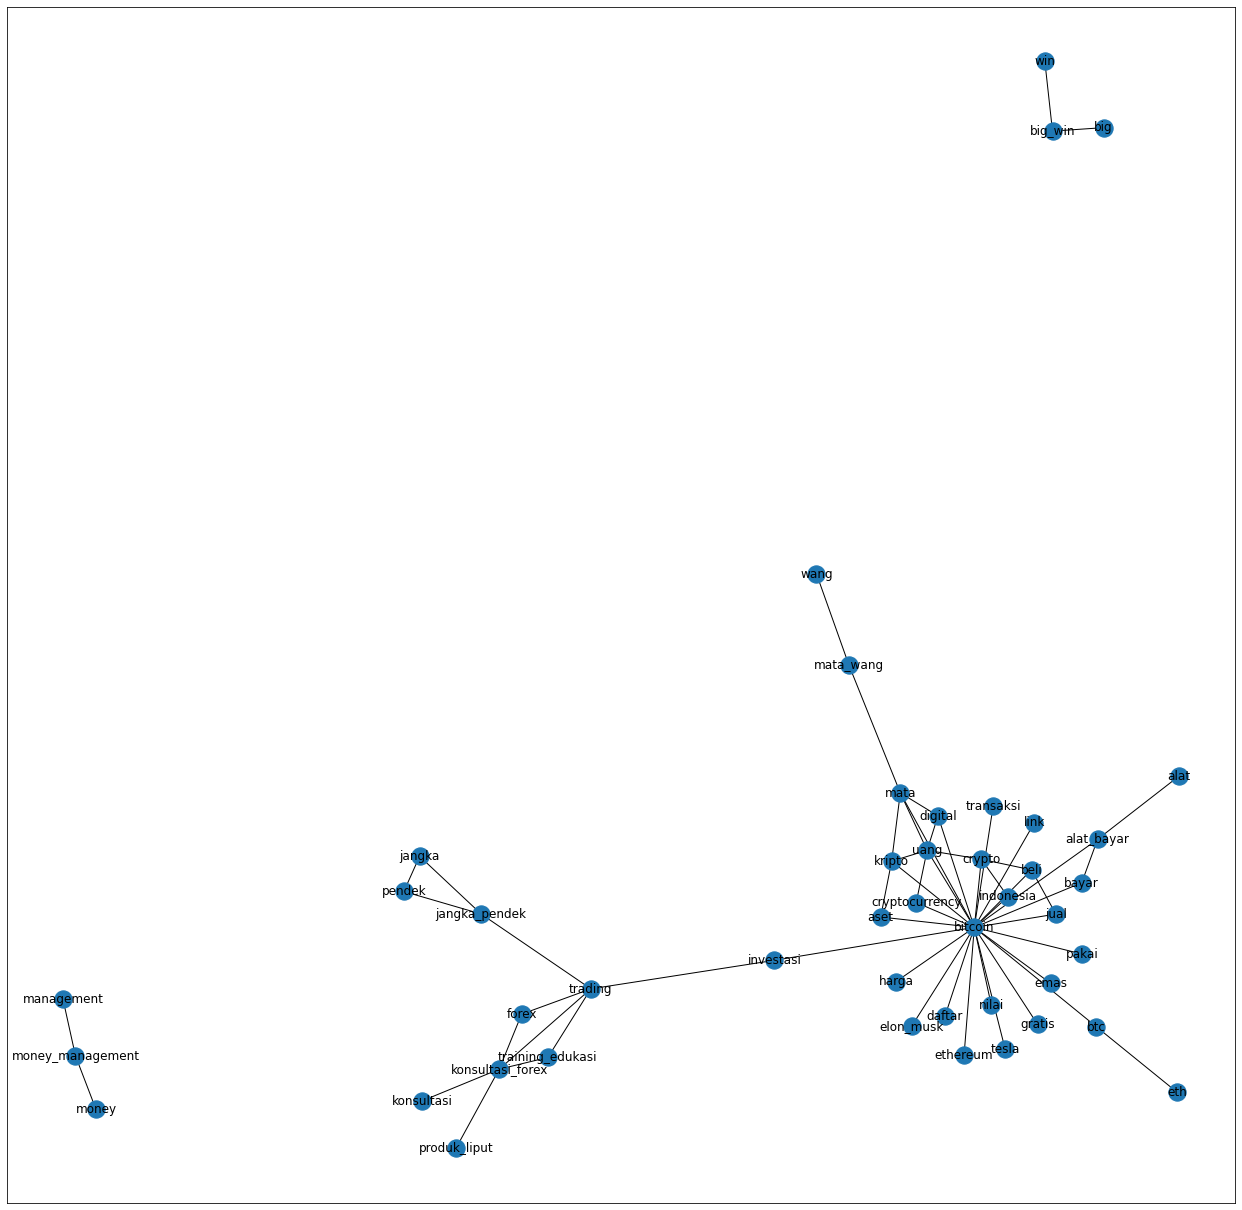

In [ ]:
graph0 = create_netGraph(dfNet0, threshold=170)
print(nx.info(graph0))

# network visualization

pt.figure(figsize=(22,22))
nx.spring_layout(graph0)
nx.draw_networkx(graph0)

In [27]:
topic_df = remove_nan(topic_df, 'clean_sentence')
topic1 = make_spec_df(topic_df, 'Dominant_Topic', 1)
topic2 = make_spec_df(topic_df, 'Dominant_Topic', 2)
topic3 = make_spec_df(topic_df, 'Dominant_Topic', 3)
topic4 = make_spec_df(topic_df, 'Dominant_Topic', 4)
topic5 = make_spec_df(topic_df, 'Dominant_Topic', 5)

In [28]:
dict1 = make_pairs(topic1, 'clean_sentence')
dict2 = make_pairs(topic2, 'clean_sentence')
dict3 = make_pairs(topic3, 'clean_sentence')
dict4 = make_pairs(topic4, 'clean_sentence')
dict5 = make_pairs(topic5, 'clean_sentence')

Name: 
Type: Graph
Number of nodes: 34
Number of edges: 66
Average degree:   3.8824


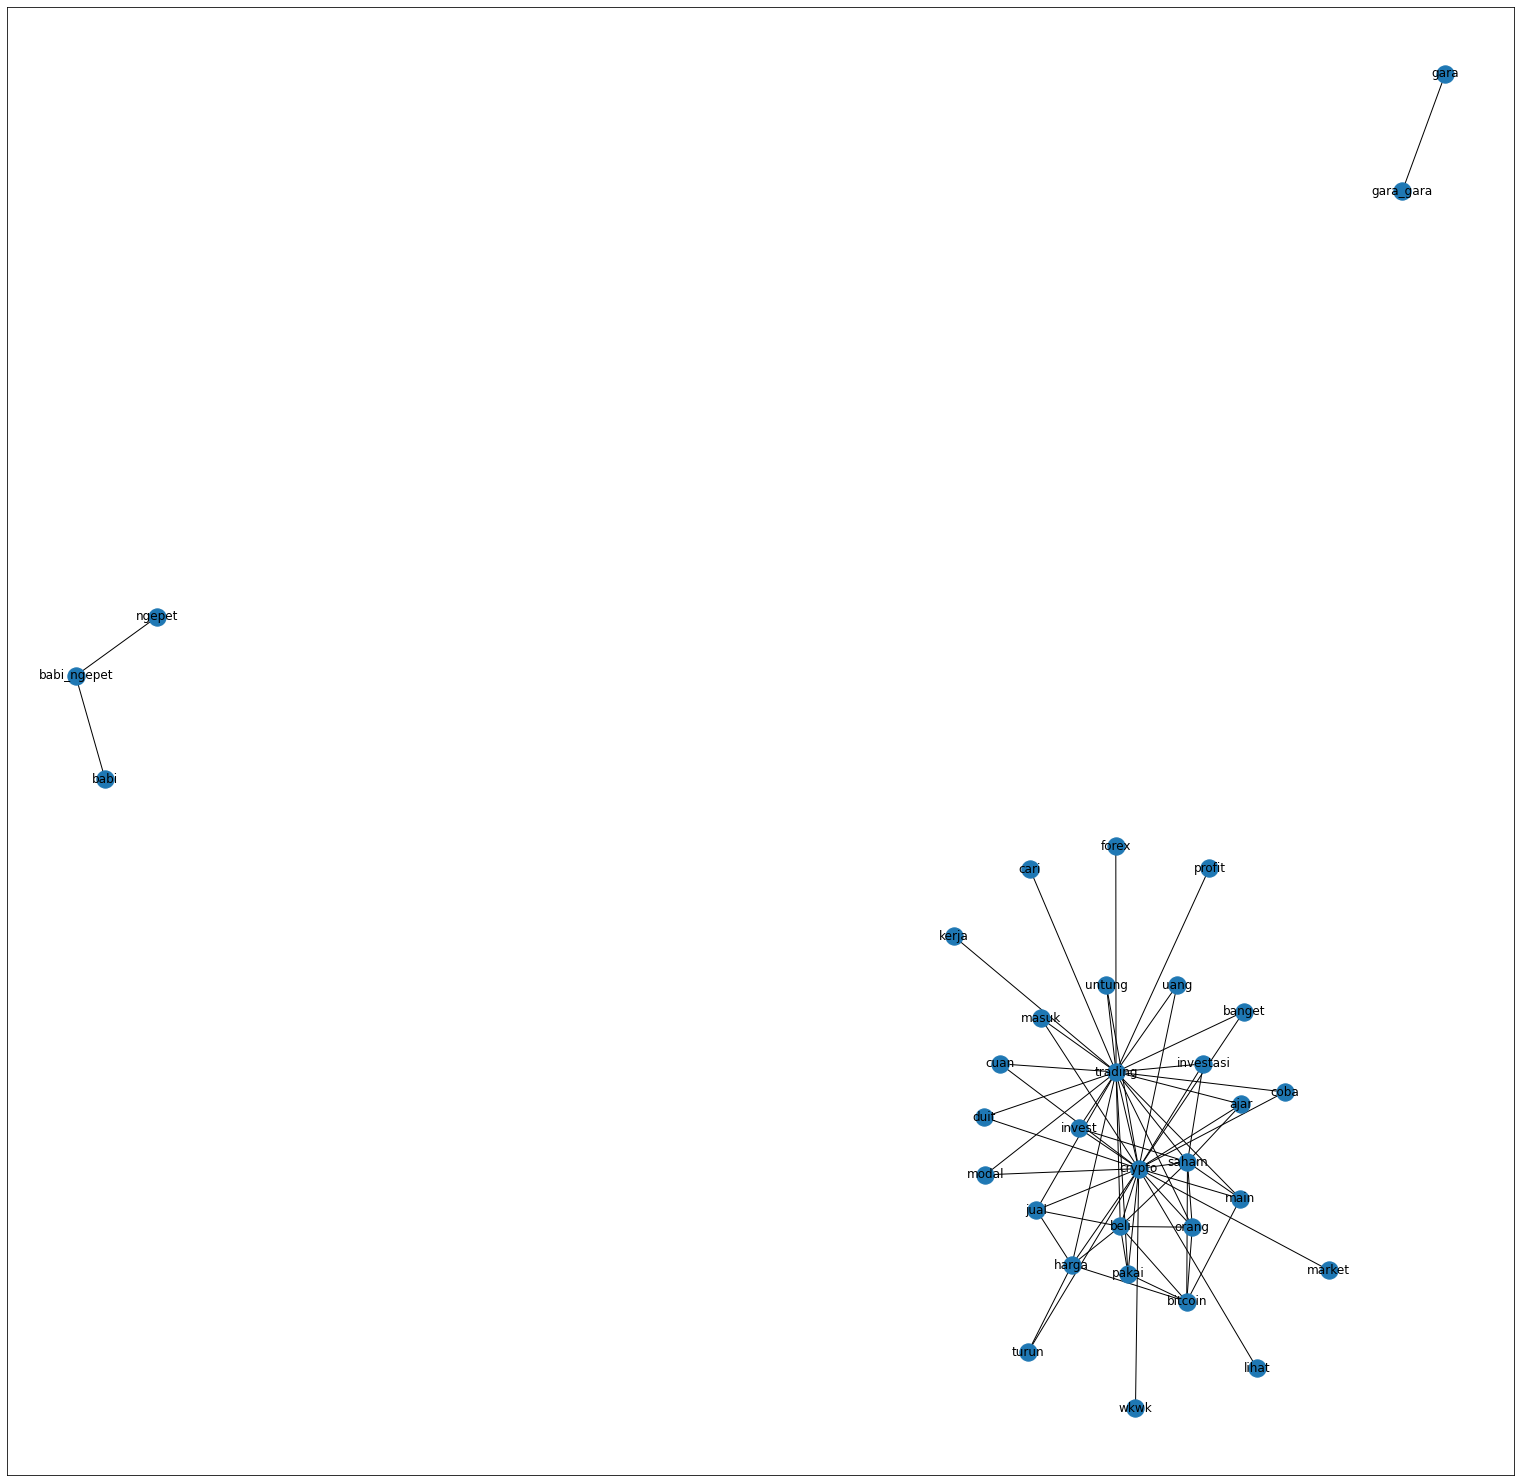

In [ ]:
graph1 = create_netGraph(dict1, threshold=370)
print(nx.info(graph1))

# network visualization

pt.figure(figsize=(27,27))
nx.spring_layout(graph1)
nx.draw_networkx(graph1)

Name: 
Type: Graph
Number of nodes: 44
Number of edges: 112
Average degree:   5.0909


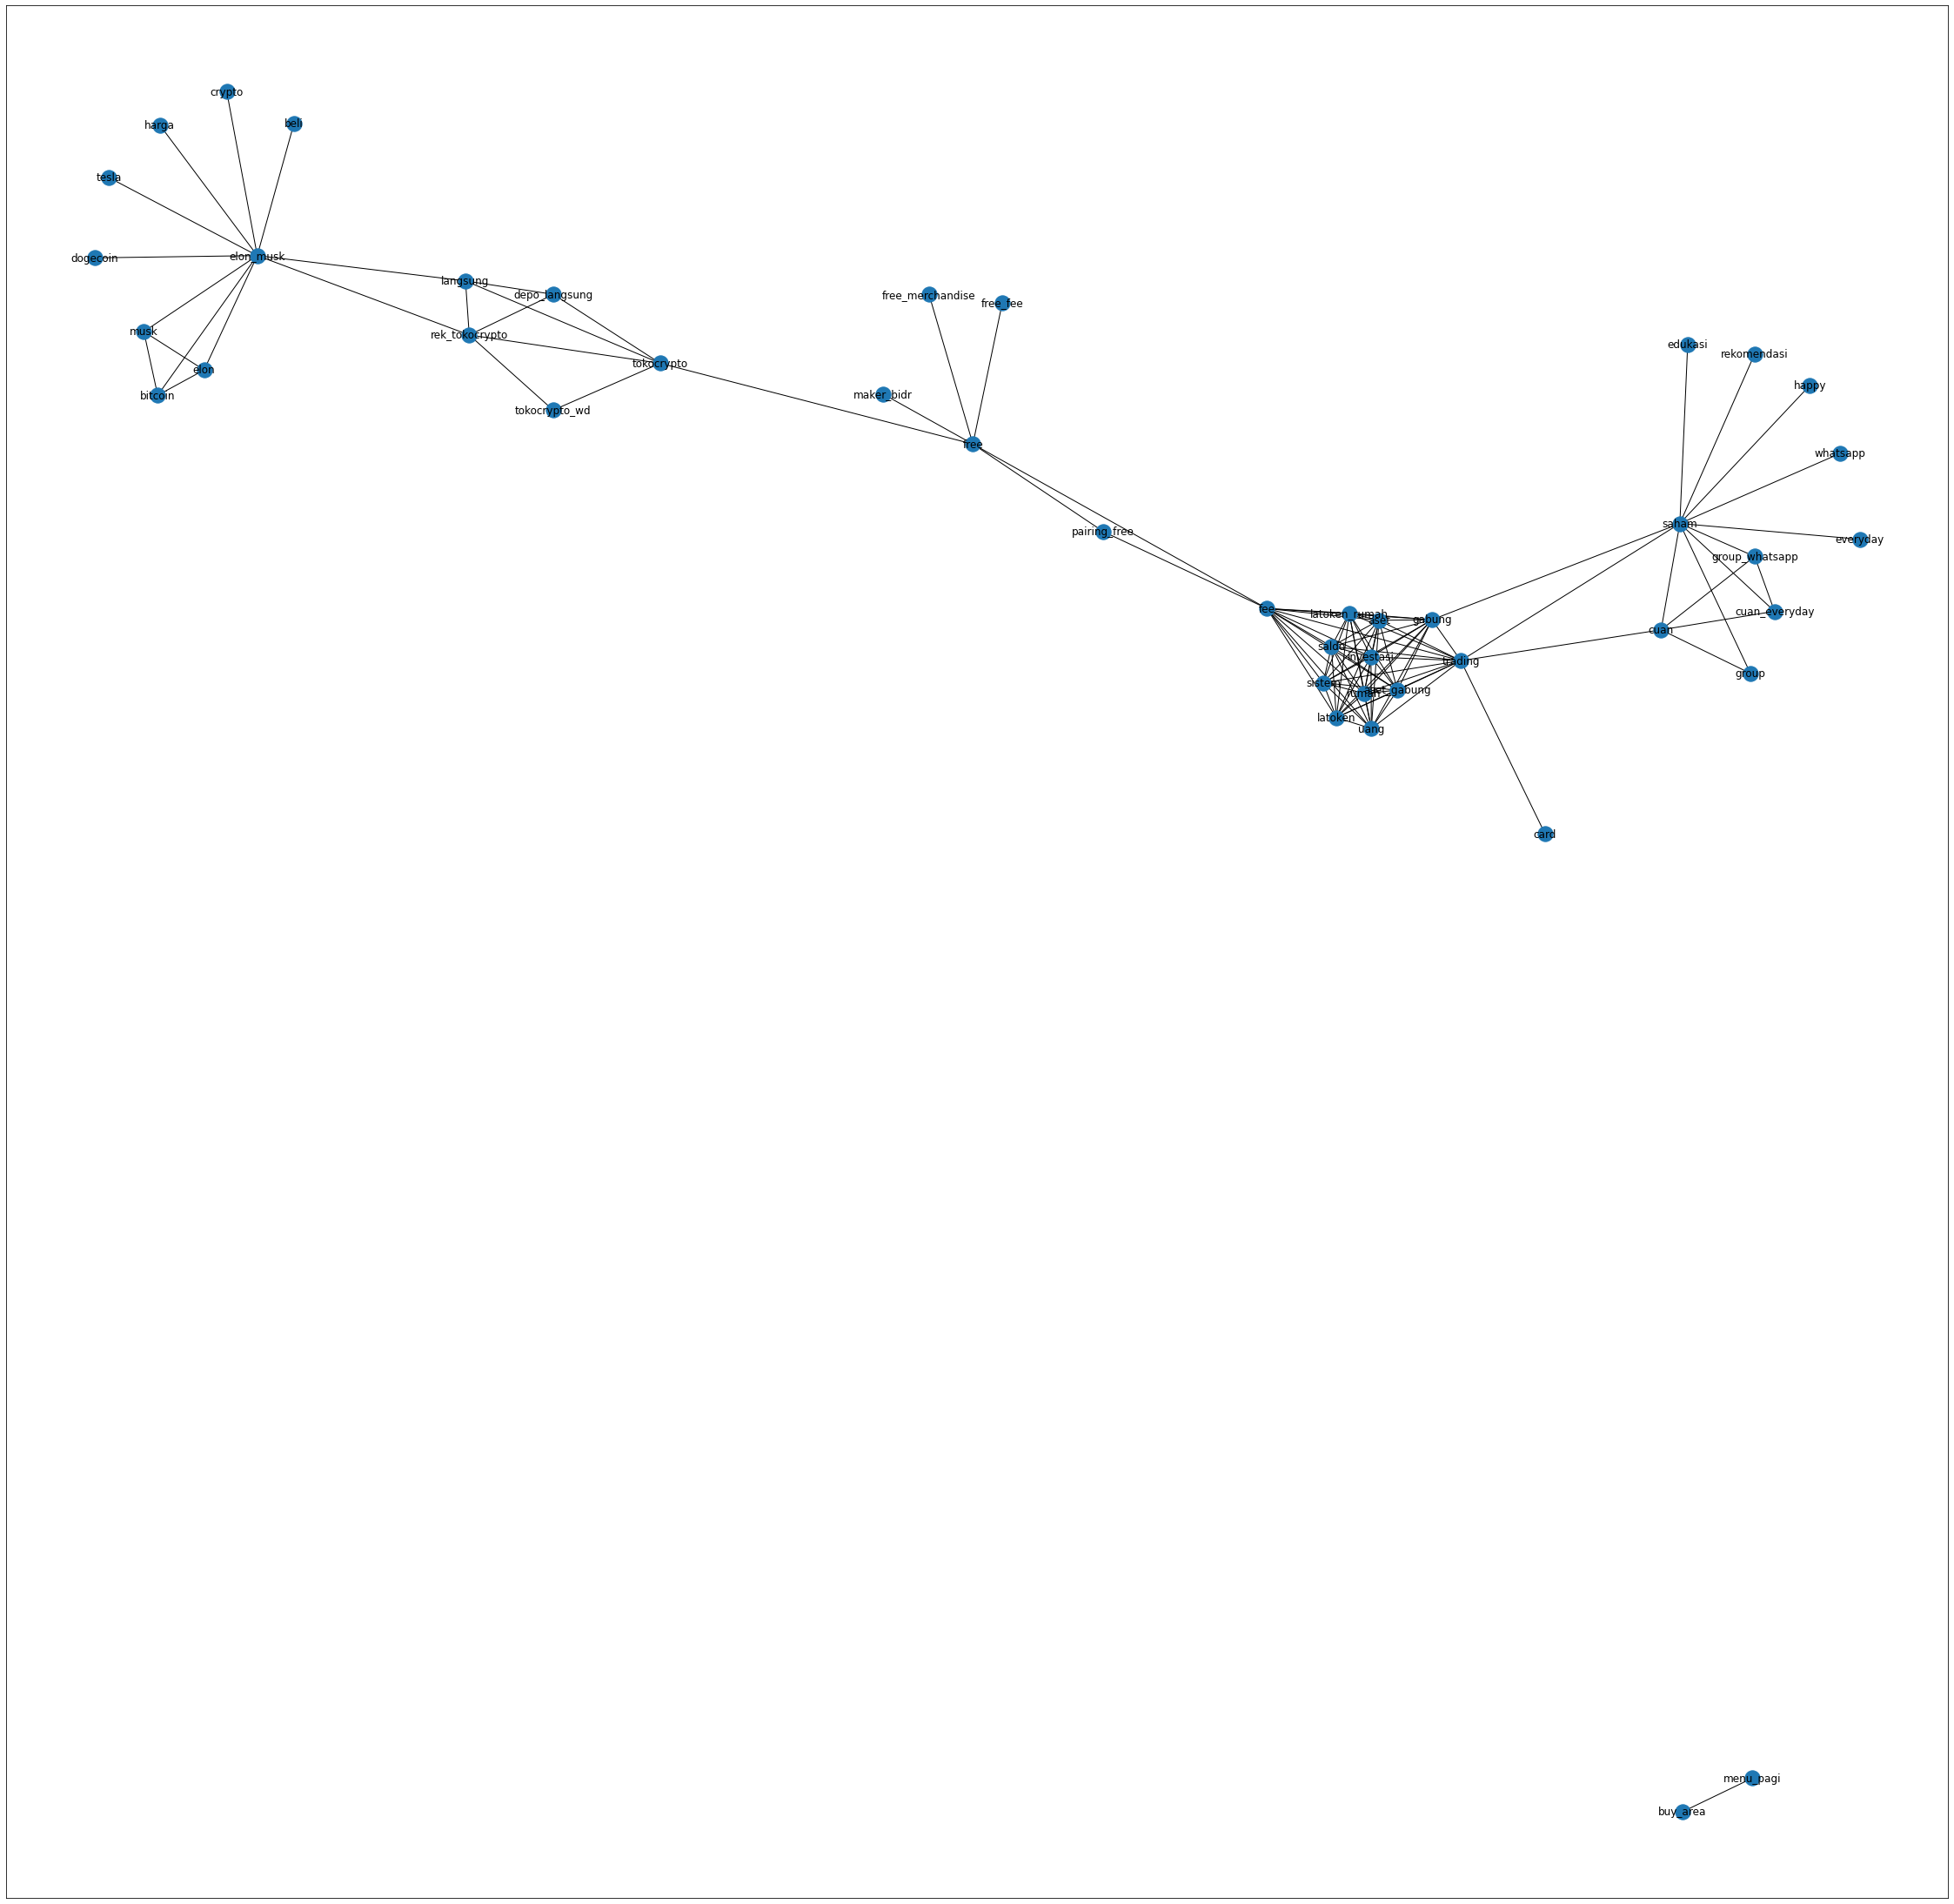

In [37]:
graph2 = create_netGraph(dict2, threshold=300)
print(nx.info(graph2))

# network visualization

pt.figure(figsize=(40,40))
nx.spring_layout(graph2)
nx.draw_networkx(graph2)

Name: 
Type: Graph
Number of nodes: 49
Number of edges: 56
Average degree:   2.2857


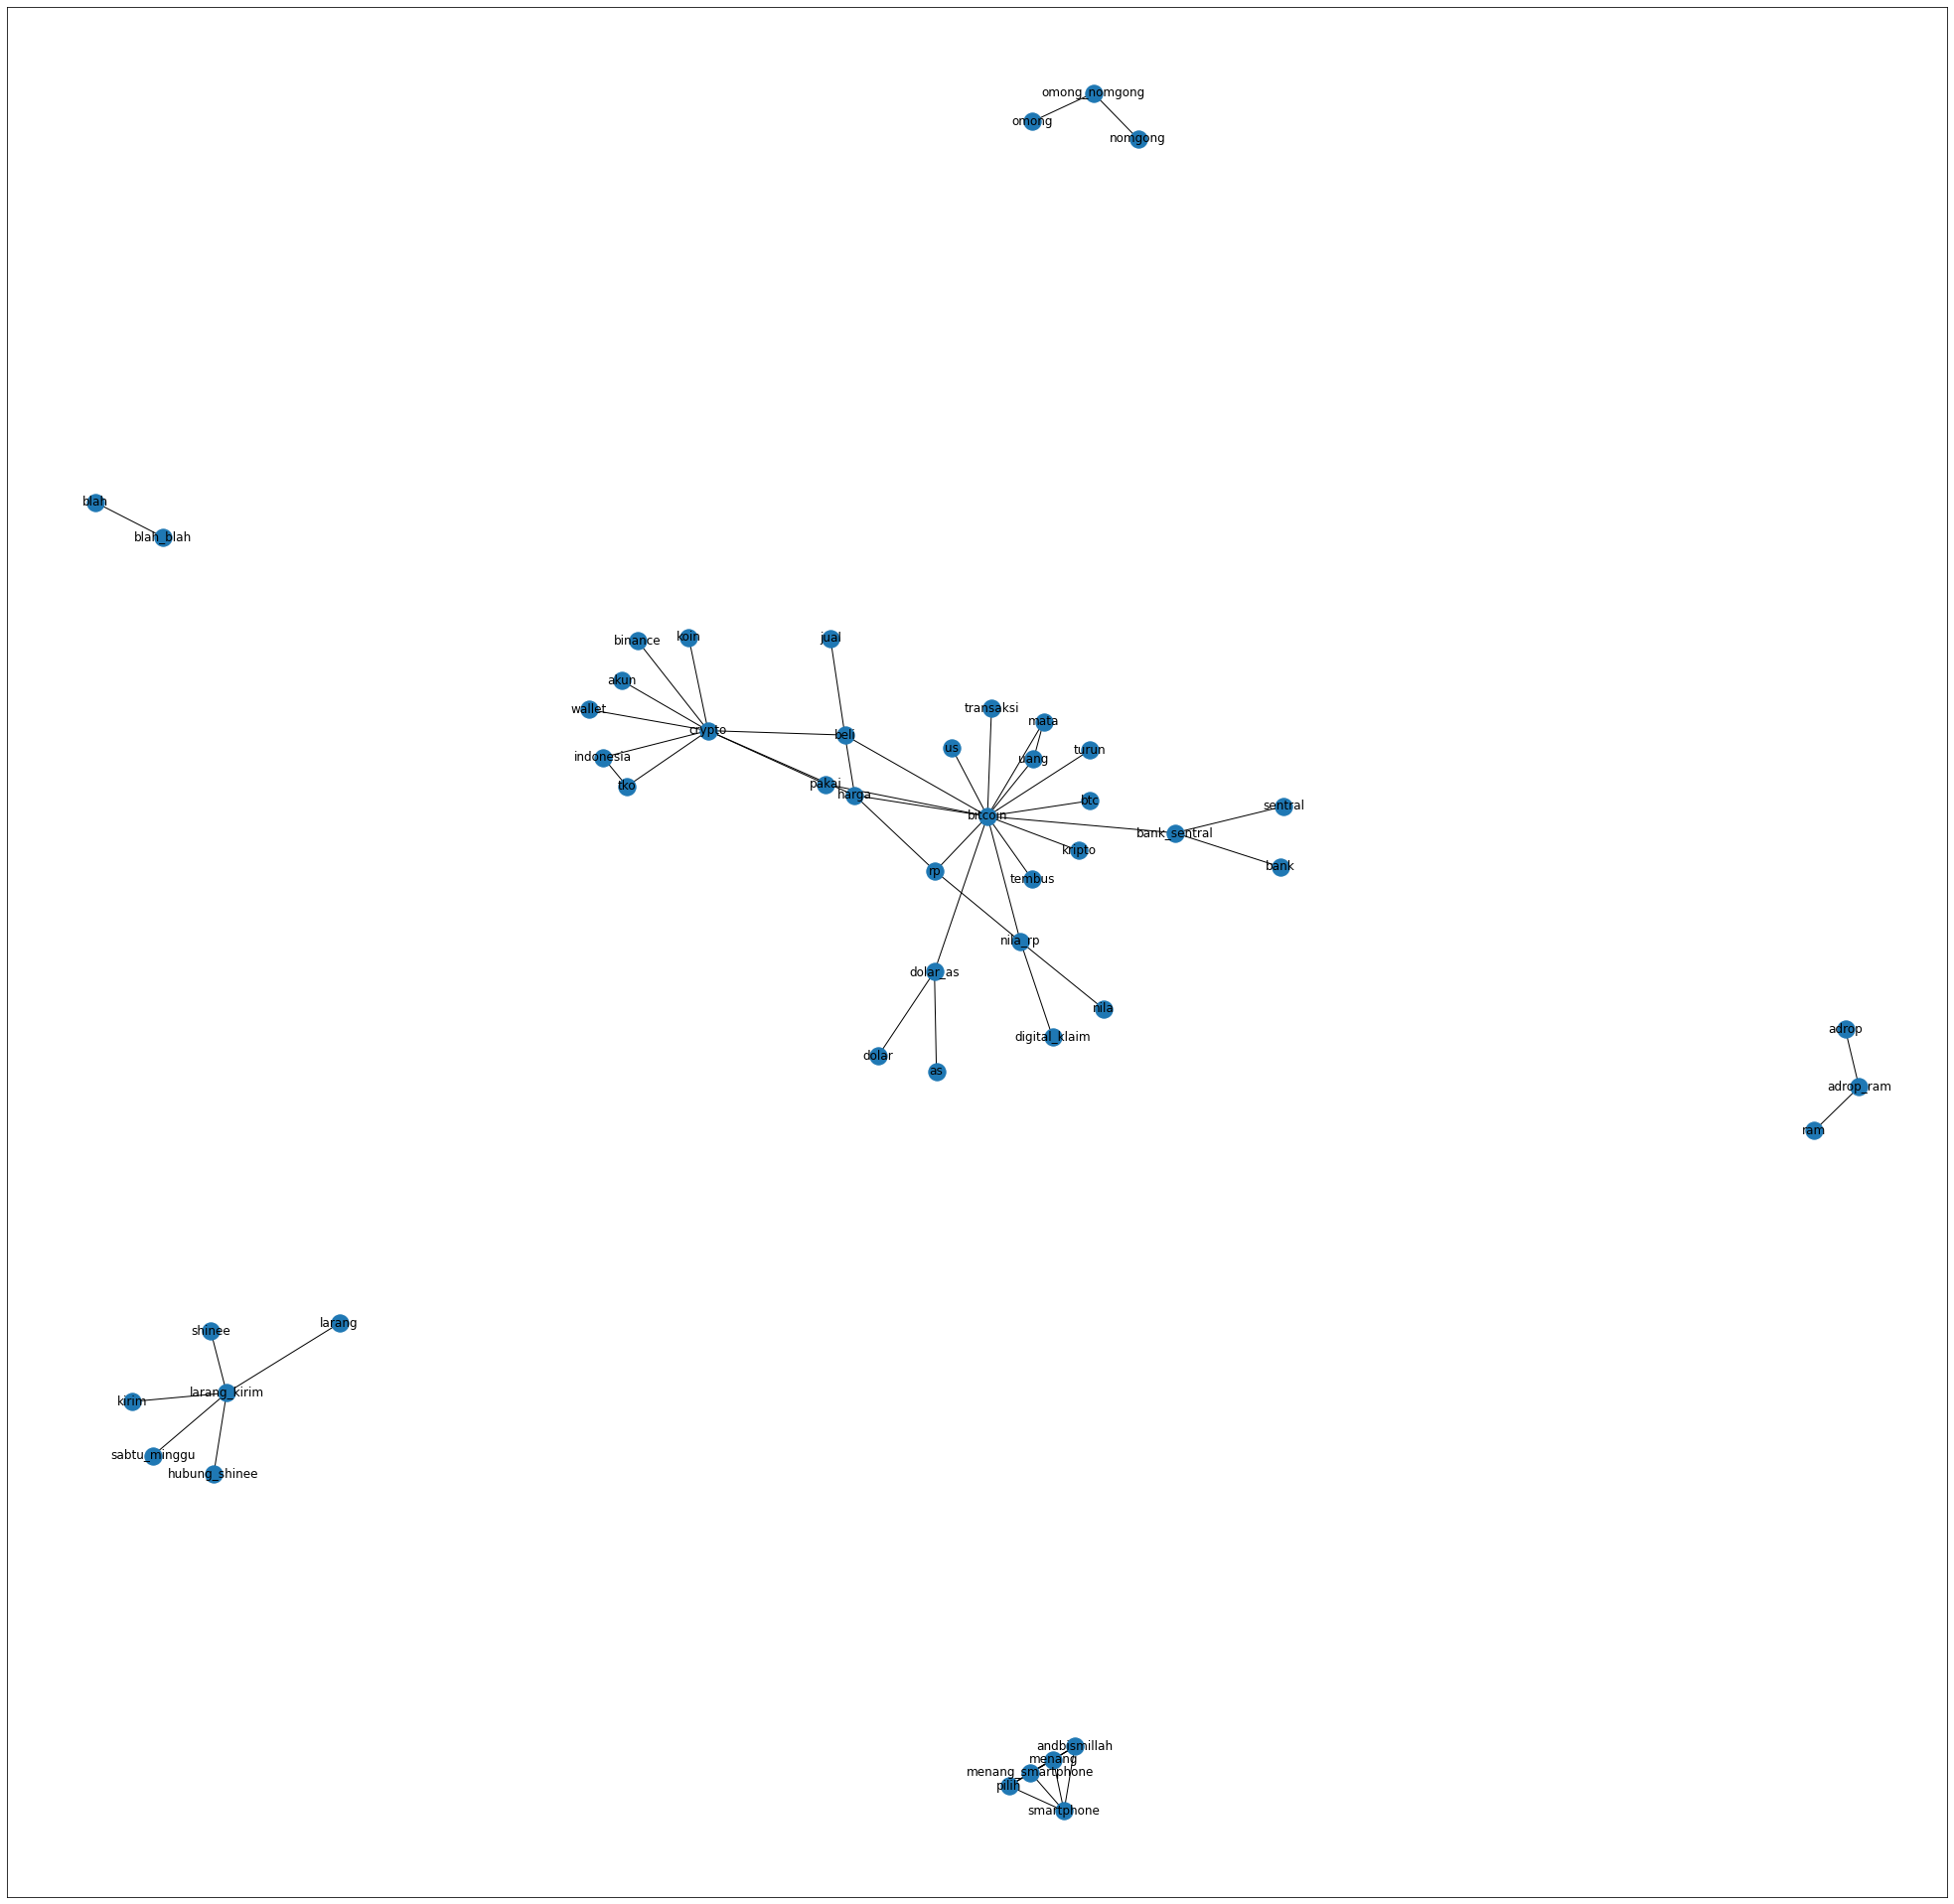

In [45]:
graph3 = create_netGraph(dict3, threshold=170)
print(nx.info(graph3))

# network visualization

pt.figure(figsize=(35,35))
nx.spring_layout(graph3)
nx.draw_networkx(graph3)

Name: 
Type: Graph
Number of nodes: 41
Number of edges: 100
Average degree:   4.8780


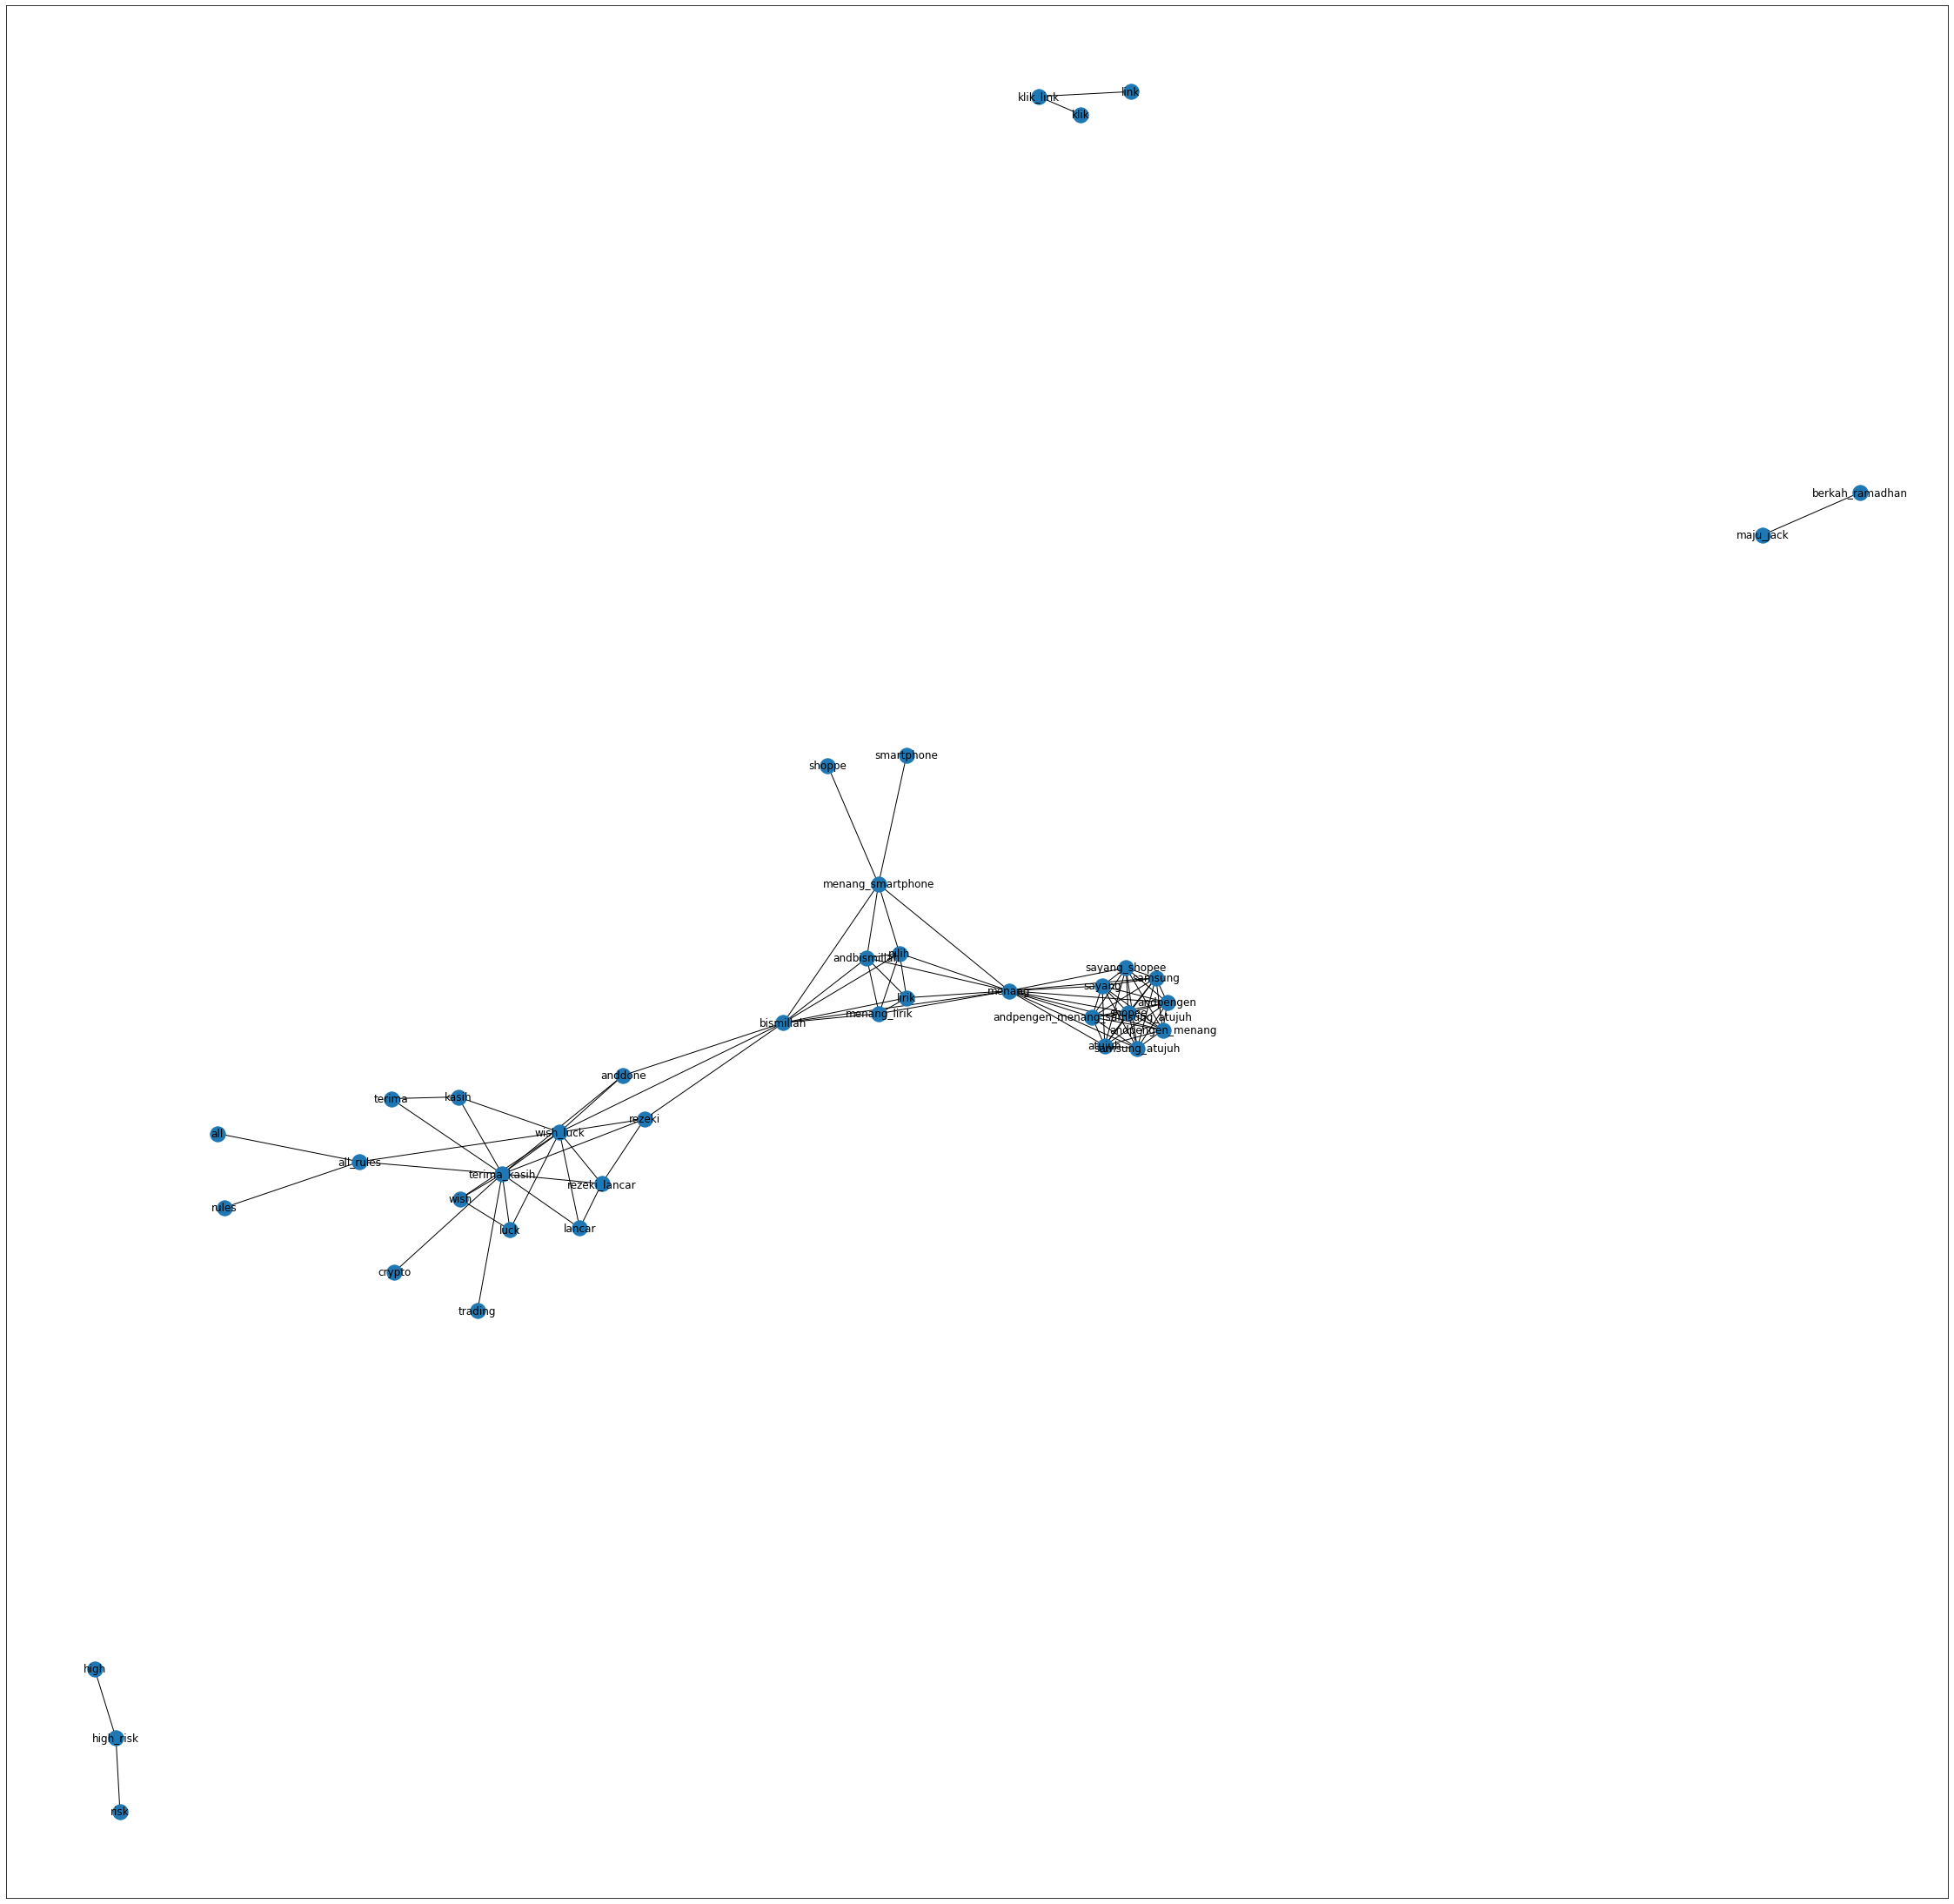

In [62]:
graph4 = create_netGraph(dict4, threshold=300)
print(nx.info(graph4))

# network visualization

pt.figure(figsize=(40,40))
nx.spring_layout(graph4)
nx.draw_networkx(graph4)

Name: 
Type: Graph
Number of nodes: 106
Number of edges: 718
Average degree:  13.5472


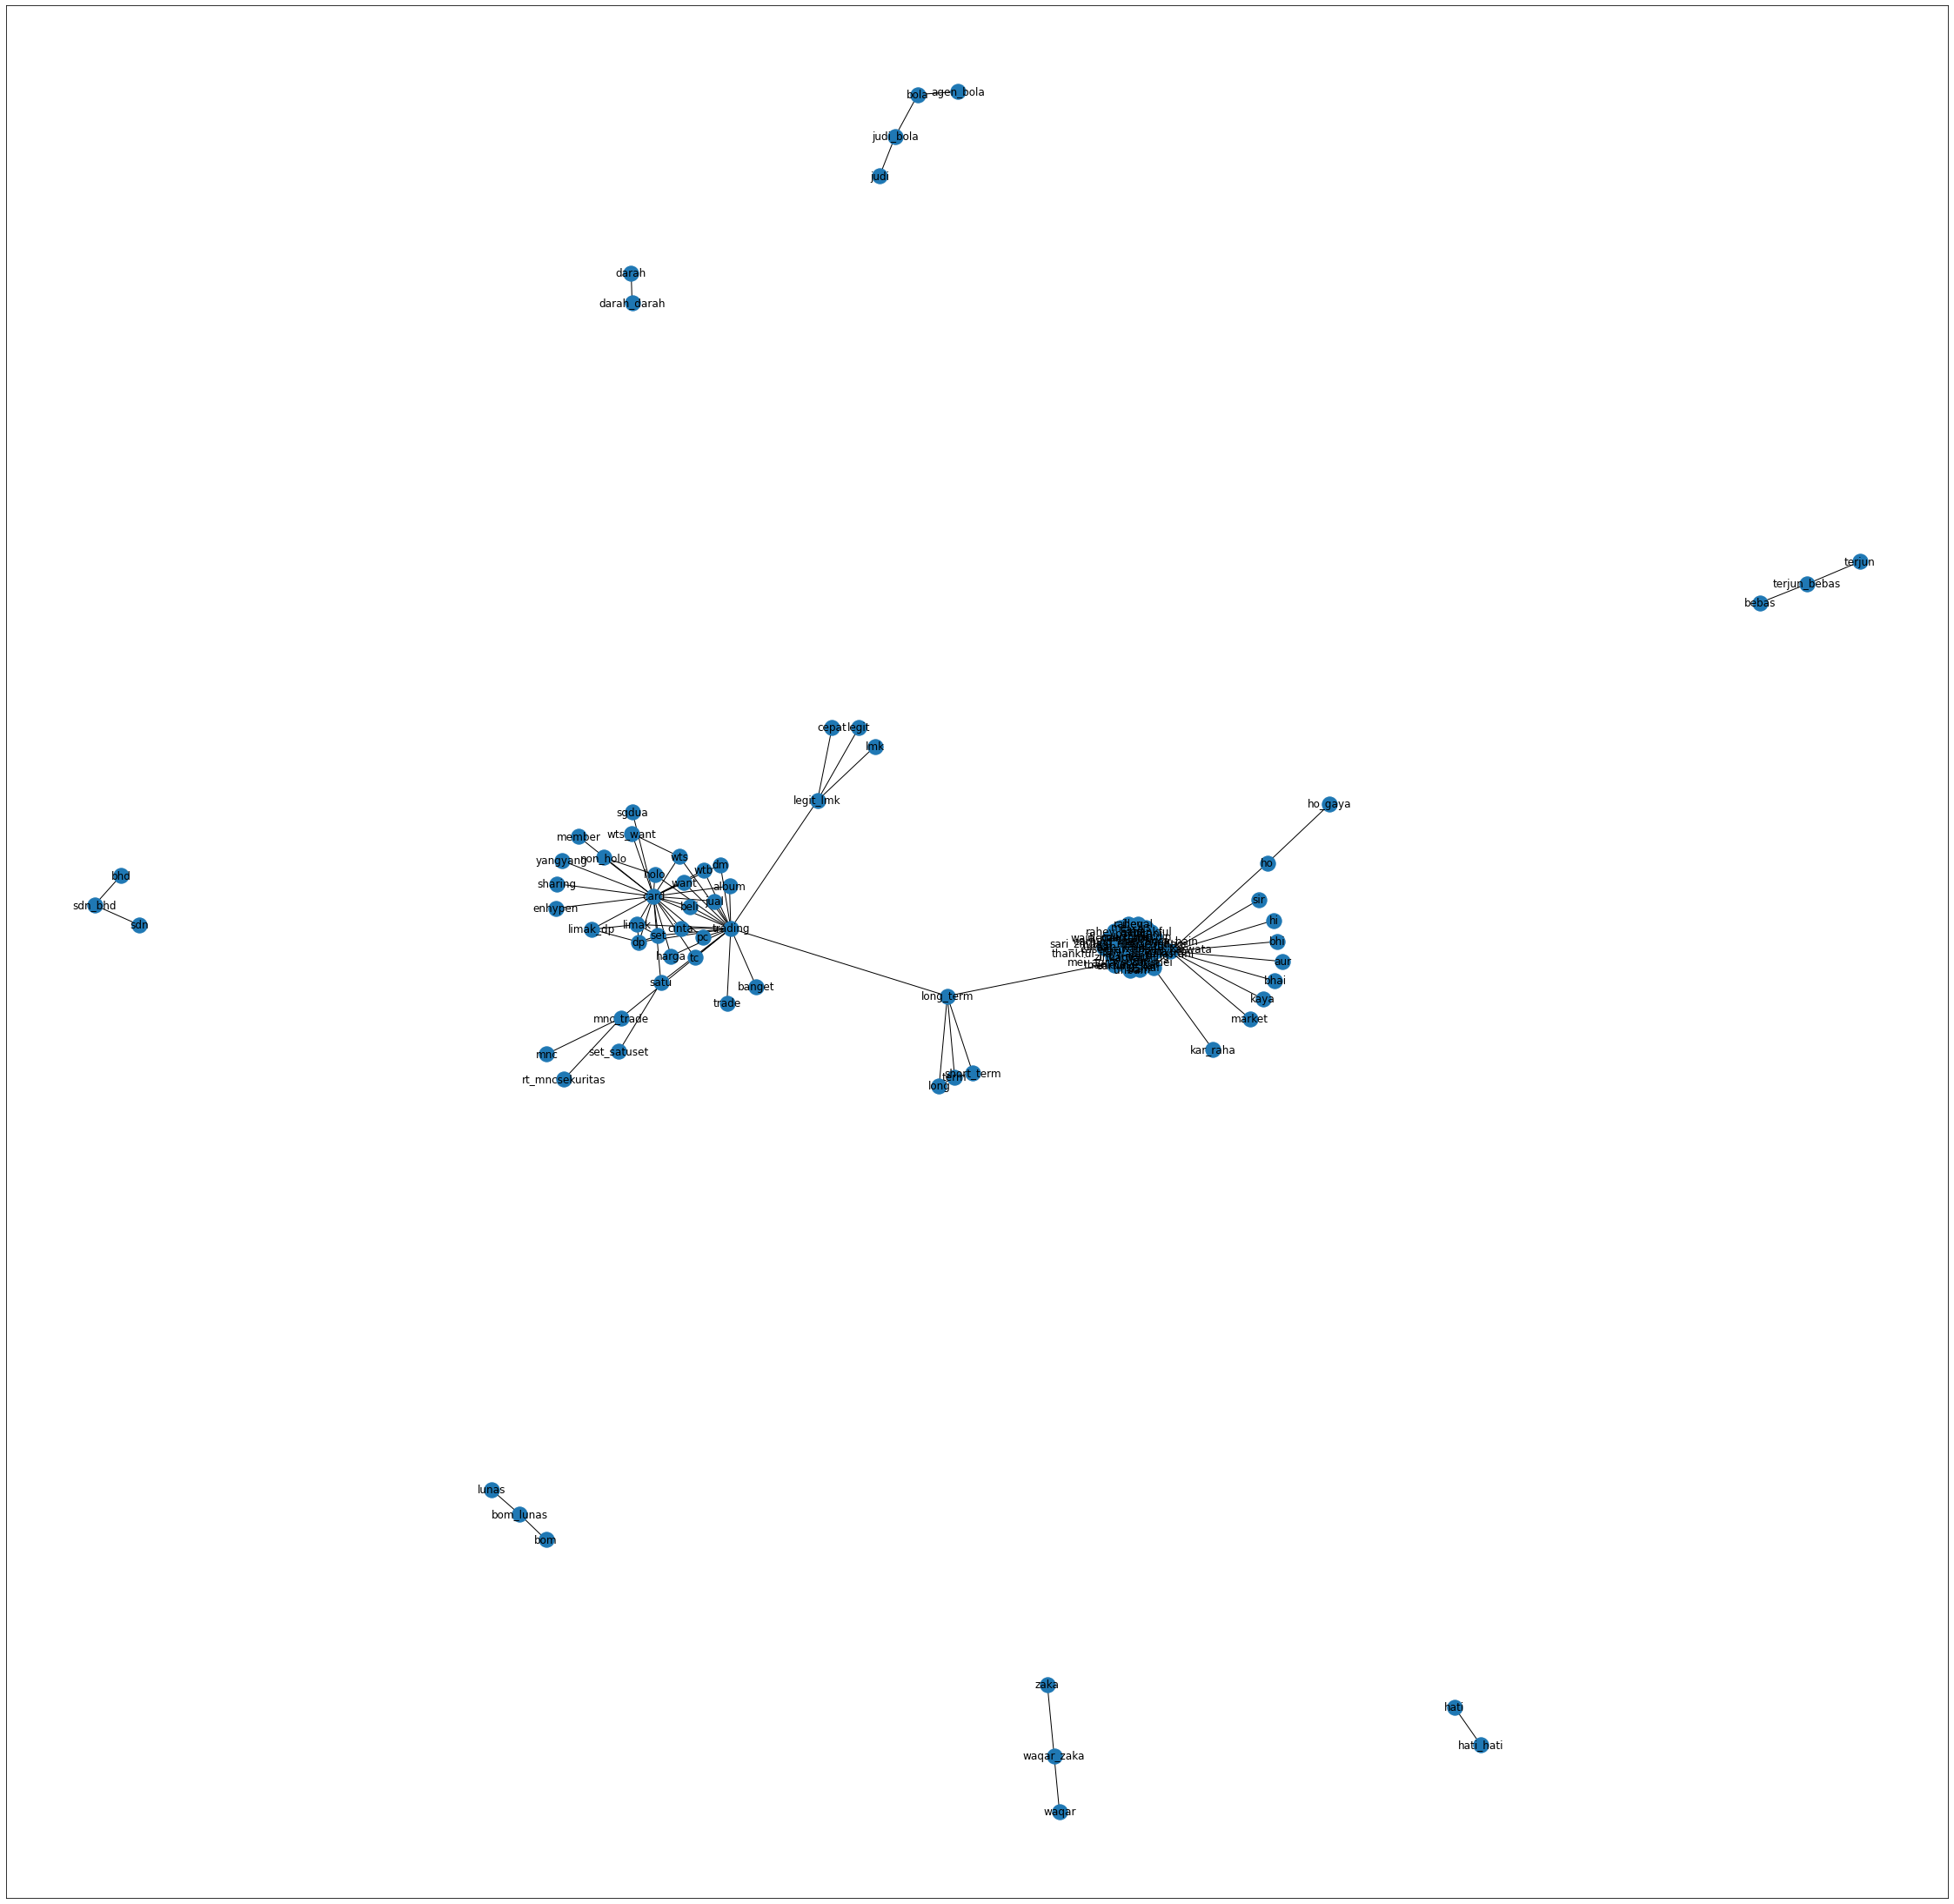

In [66]:
graph5 = create_netGraph(dict5, threshold=100)
print(nx.info(graph5))

# network visualization

pt.figure(figsize=(40,40))
nx.spring_layout(graph5)
nx.draw_networkx(graph5)

In [74]:
dicts = make_pairs(topic_df, 'clean_sentence')
graphs = create_netGraph(dicts, threshold=400)
print(nx.info(graphs))

Name: 
Type: Graph
Number of nodes: 152
Number of edges: 357
Average degree:   4.6974


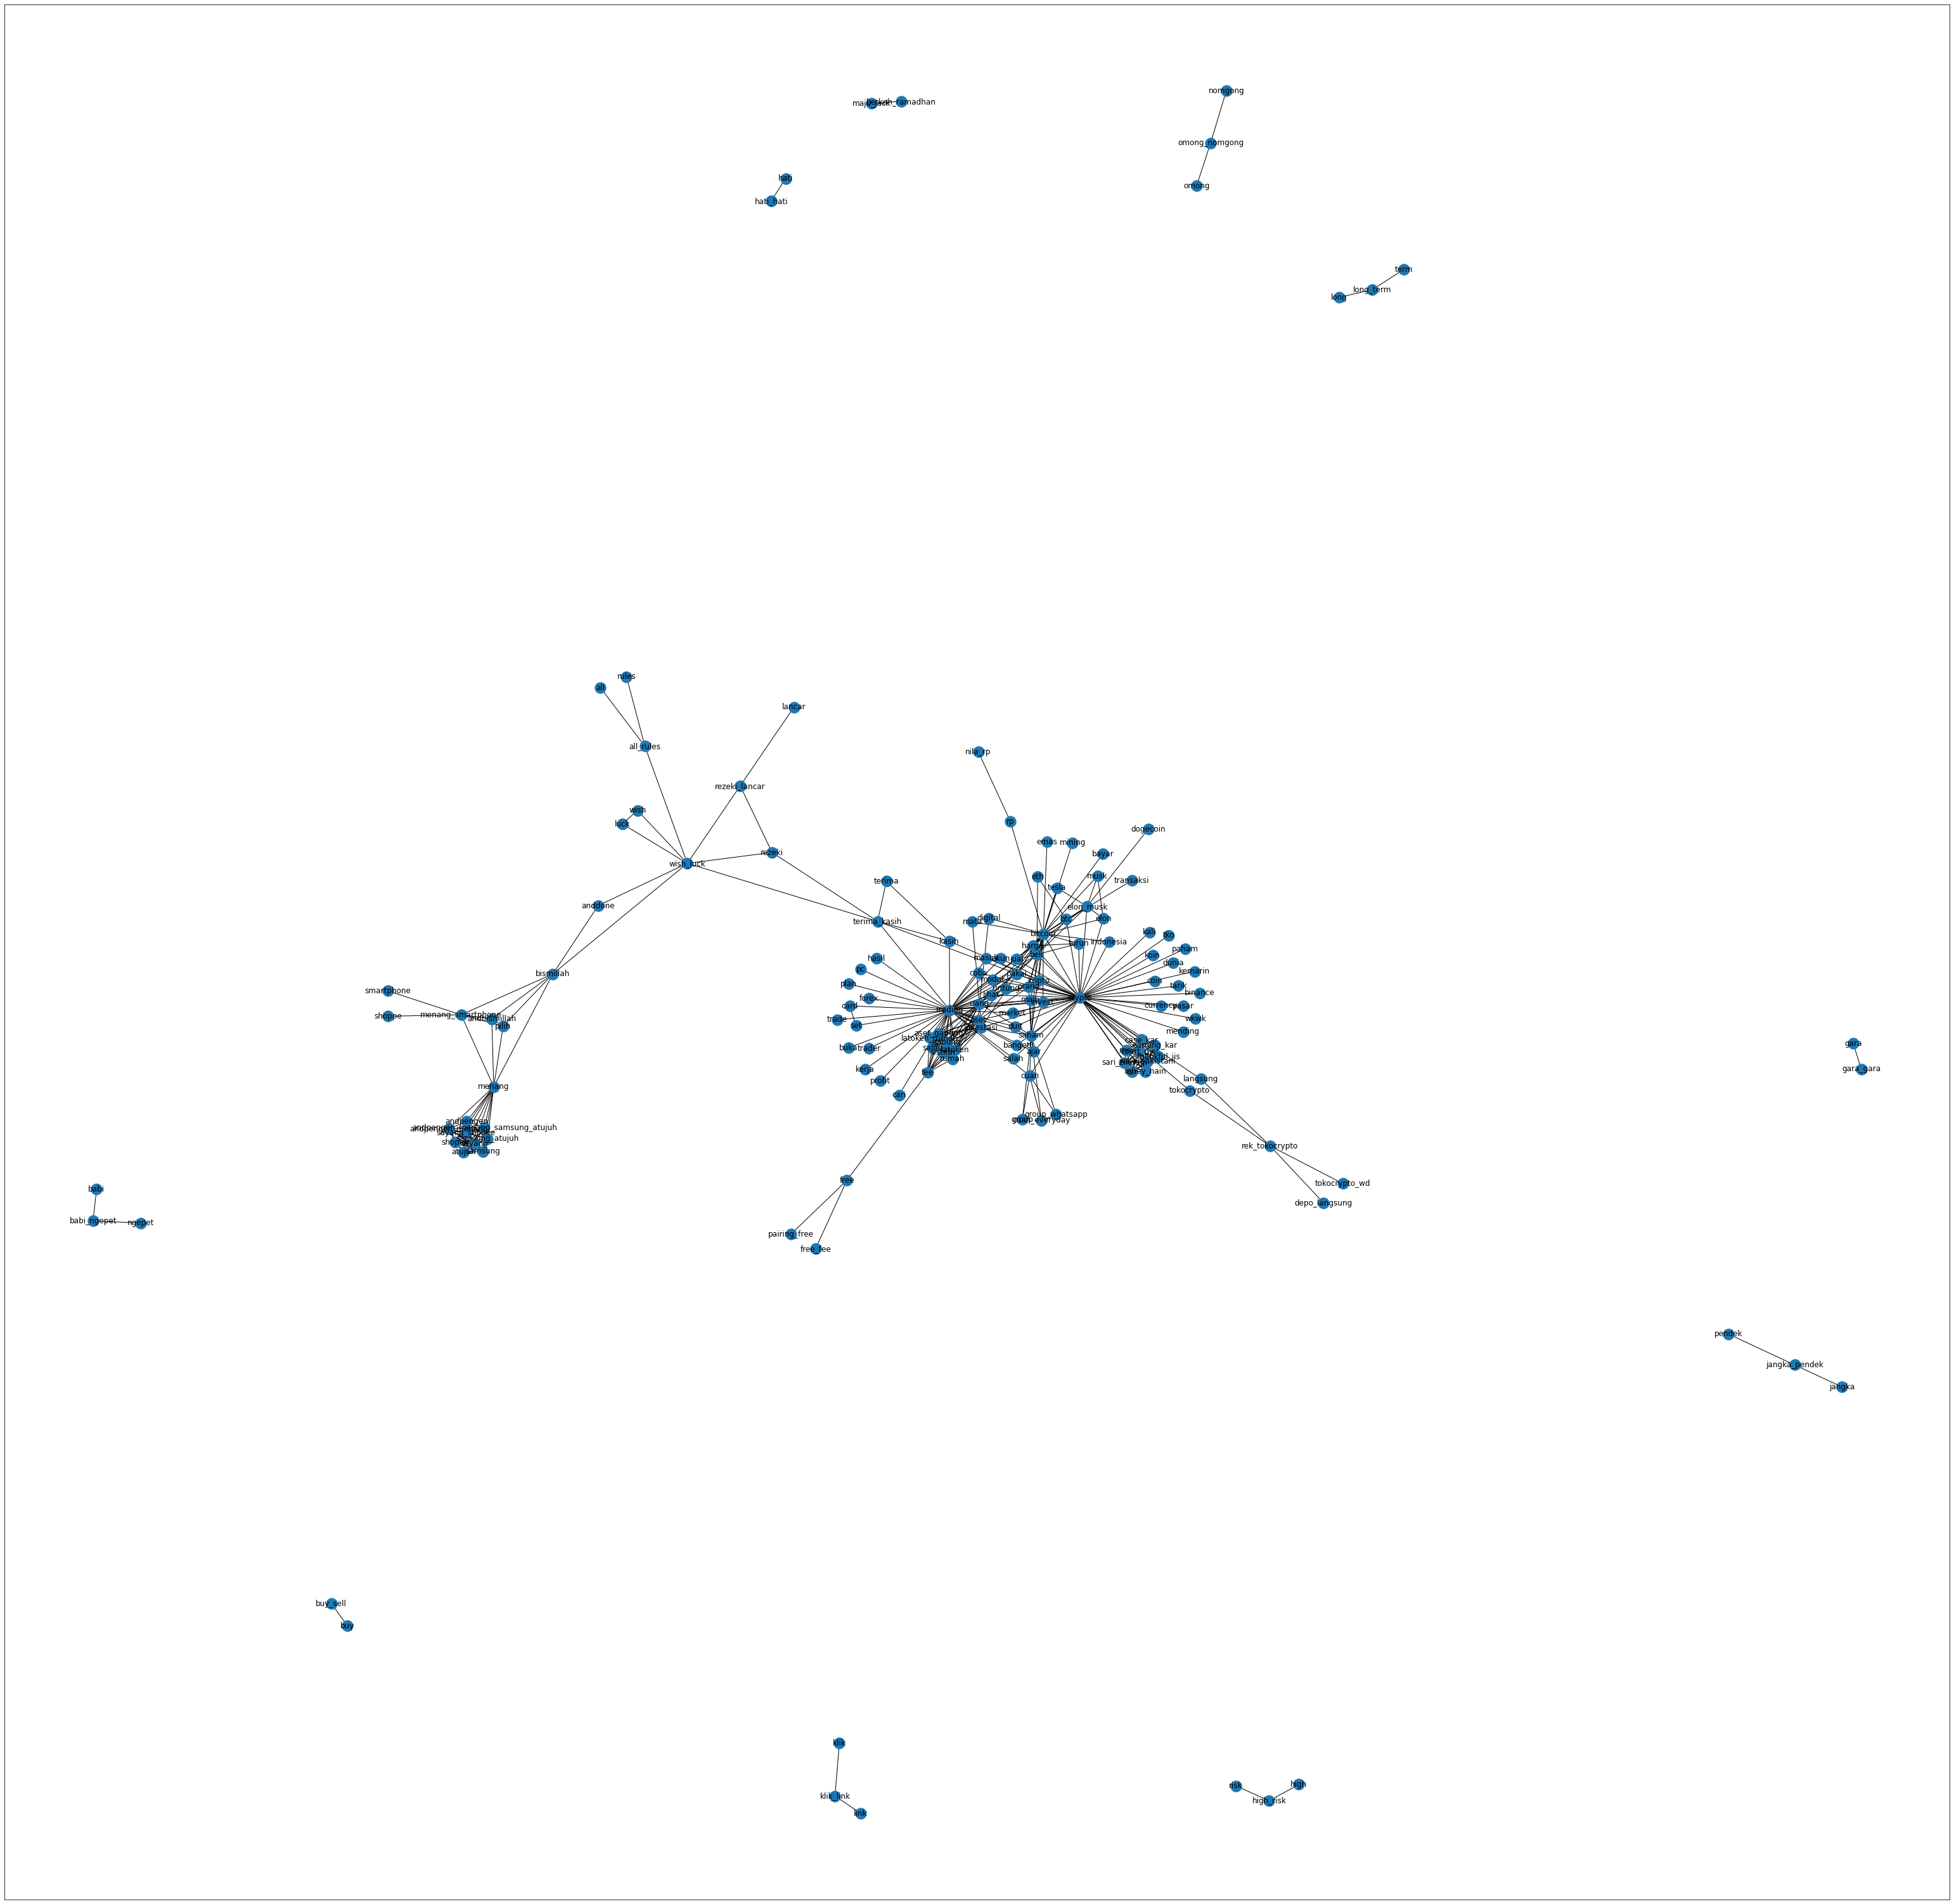

In [79]:
# network visualization

pt.figure(figsize=(55,55))
nx.spring_layout(graphs)
nx.draw_networkx(graphs)

Name: 
Type: Graph
Number of nodes: 23
Number of edges: 21
Average degree:   1.8261
Name: 
Type: Graph
Number of nodes: 48
Number of edges: 91
Average degree:   3.7917
Name: 
Type: Graph
Number of nodes: 44
Number of edges: 112
Average degree:   5.0909
Name: 
Type: Graph
Number of nodes: 21
Number of edges: 15
Average degree:   1.4286
Name: 
Type: Graph
Number of nodes: 41
Number of edges: 100
Average degree:   4.8780
Name: 
Type: Graph
Number of nodes: 19
Number of edges: 54
Average degree:   5.6842


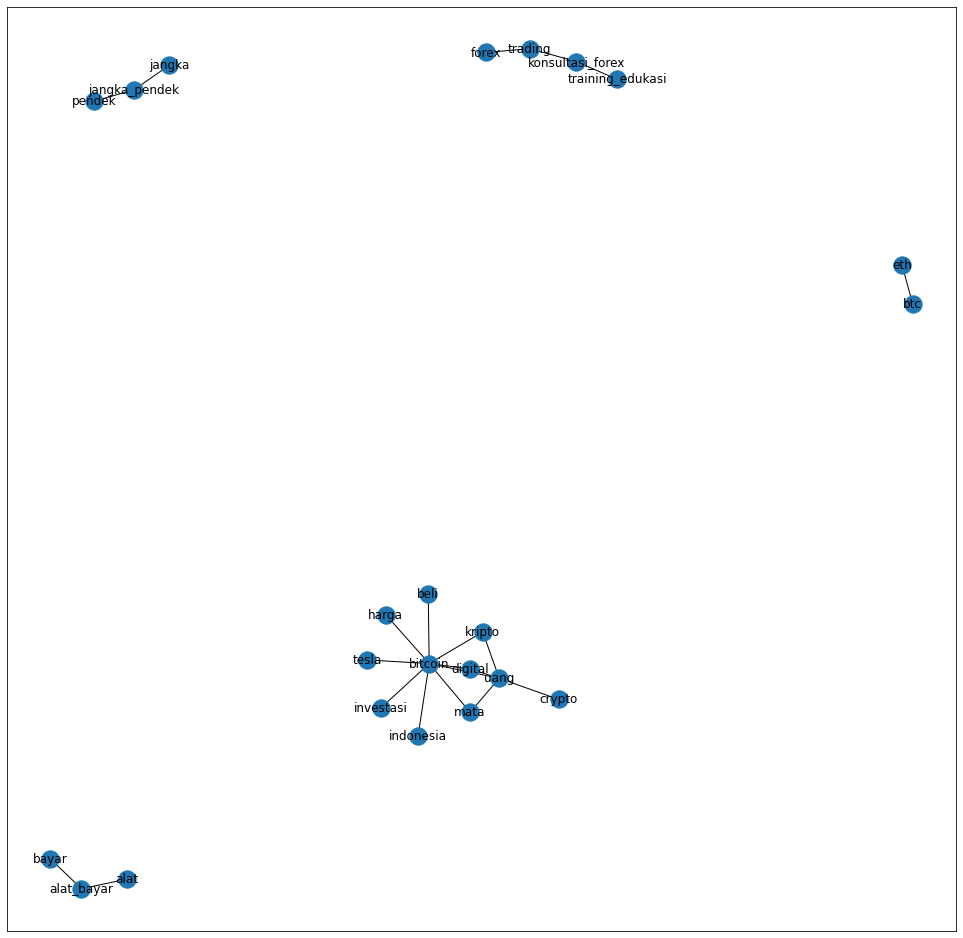

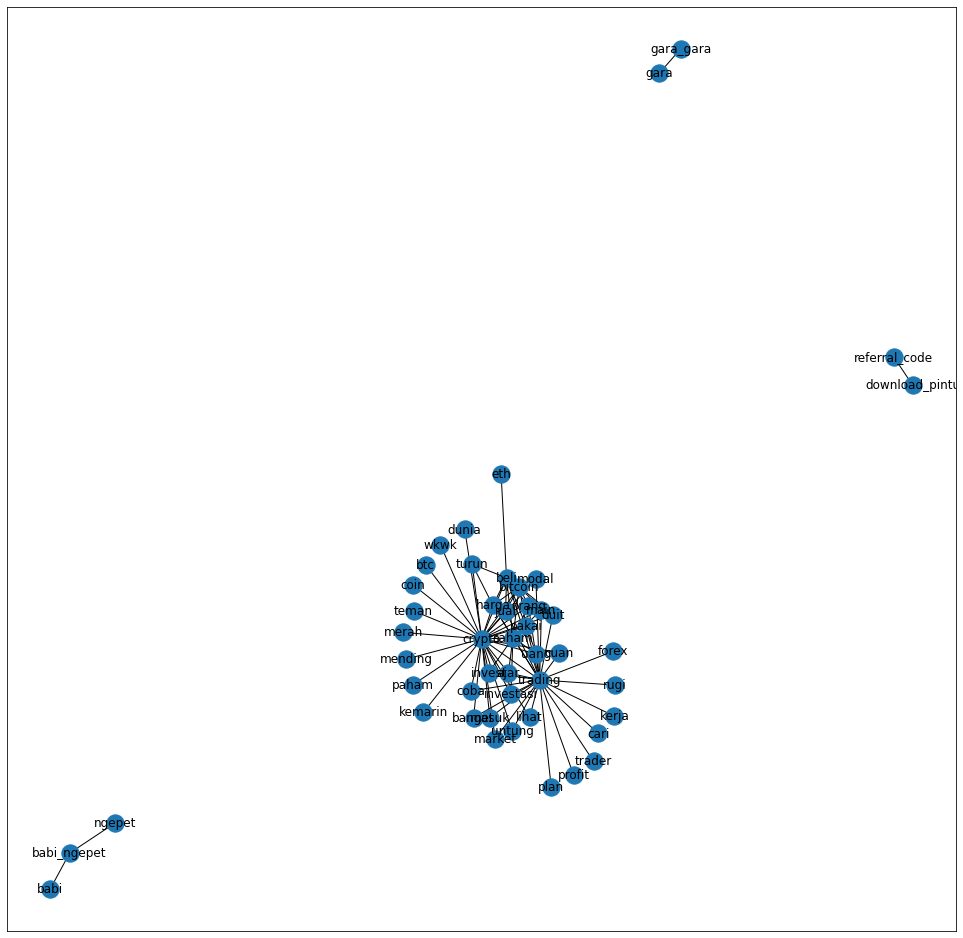

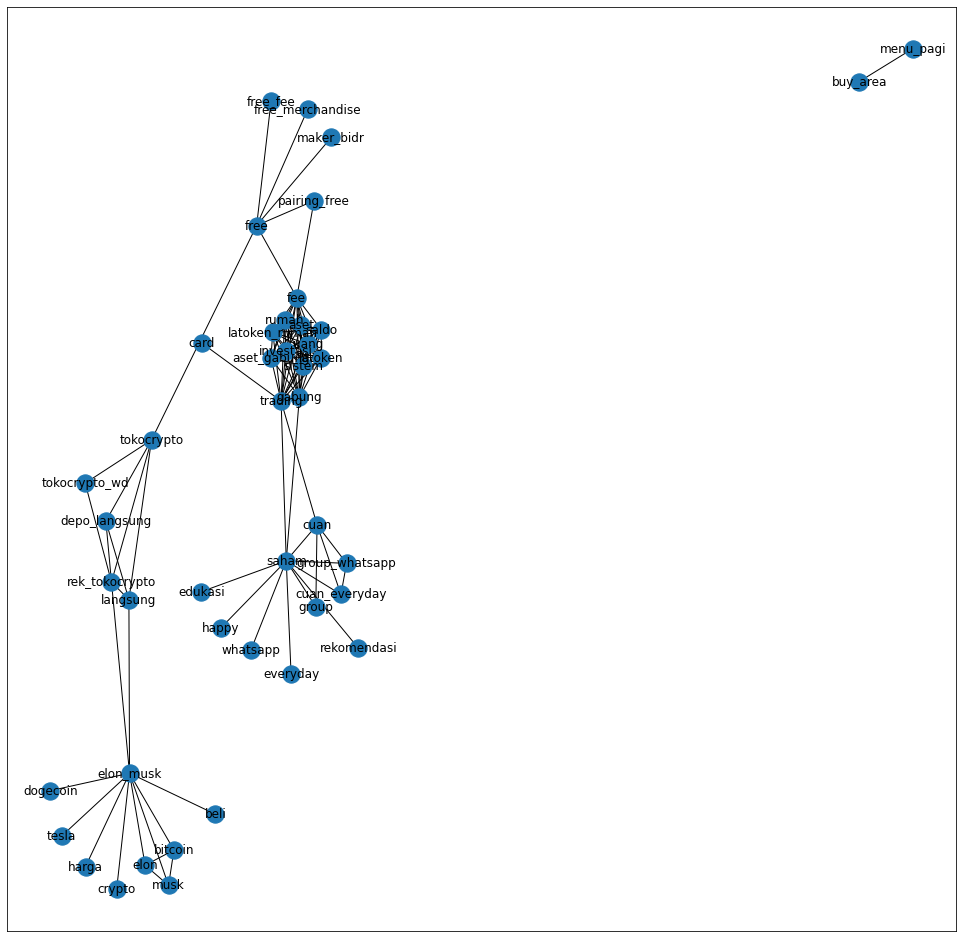

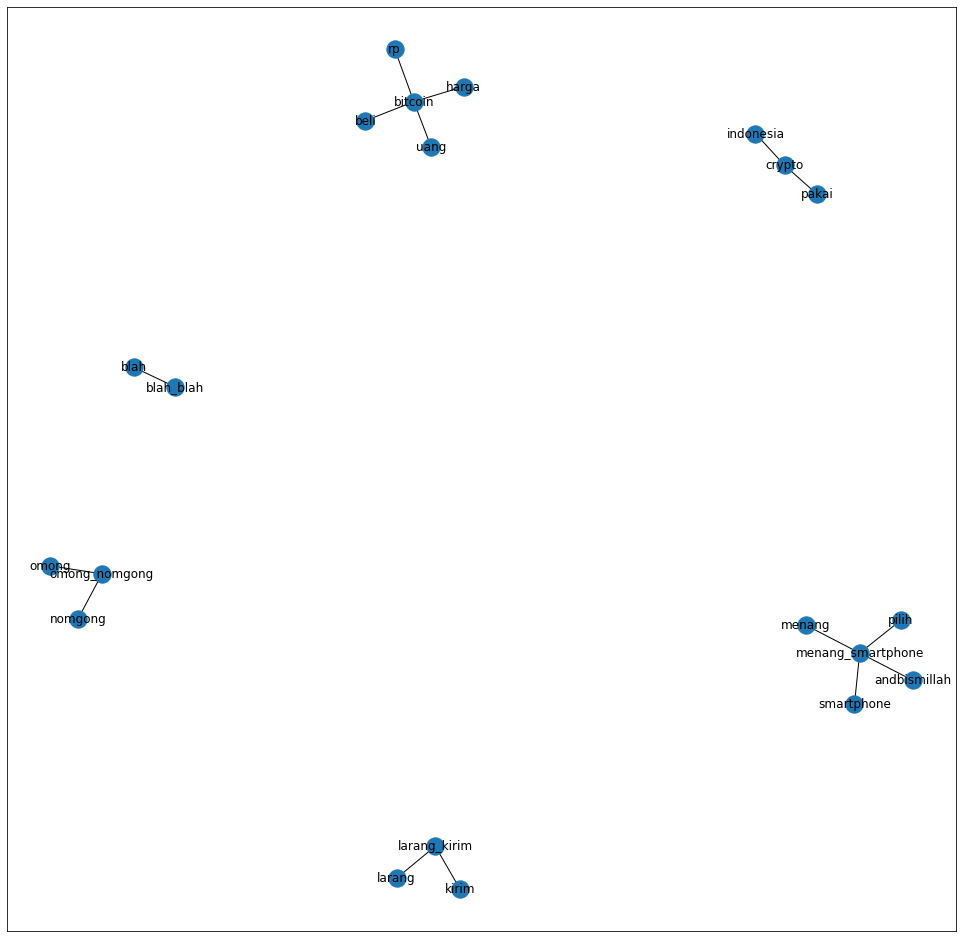

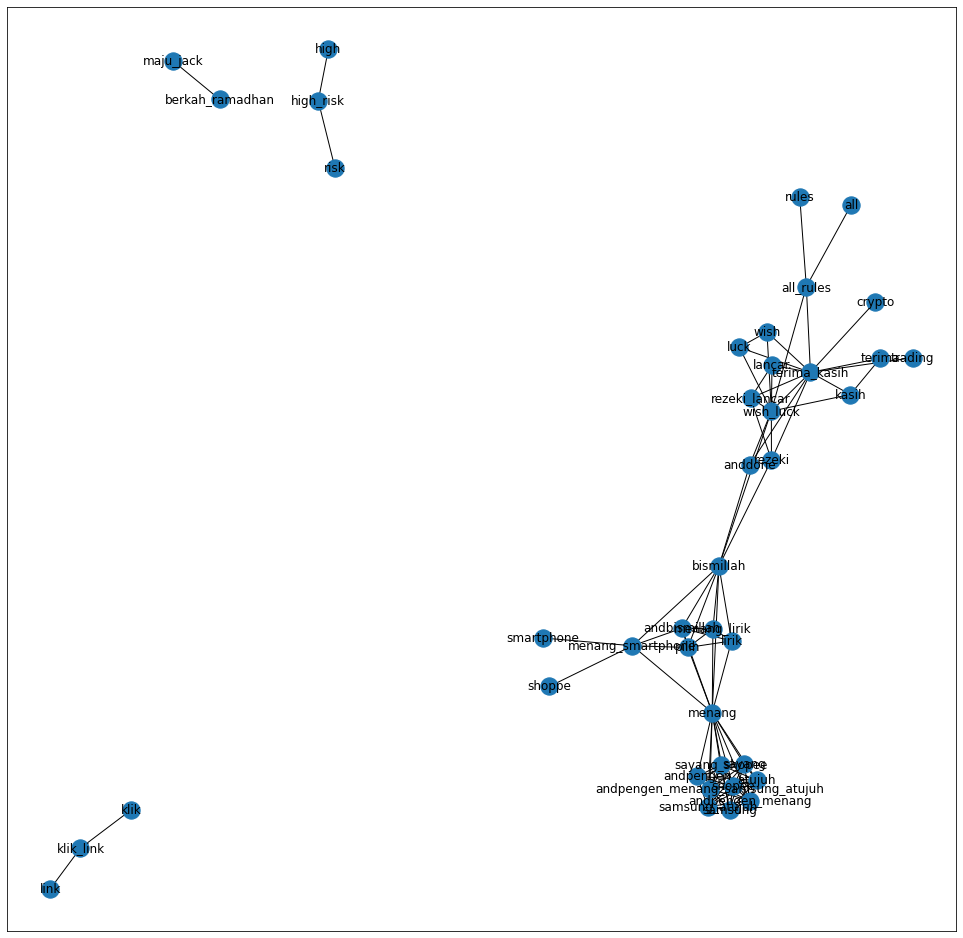

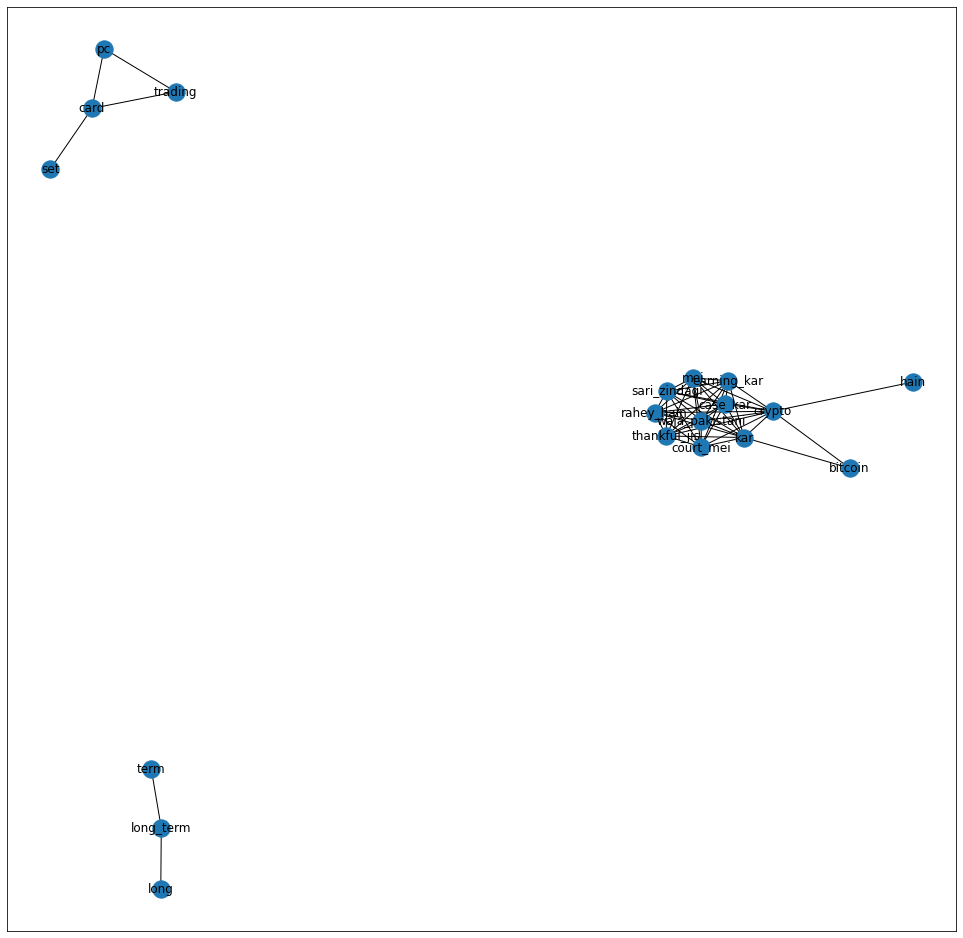

In [ ]:
for i in range(0, 6):
  spec_df = make_spec_df(topic_df, 'Dominant_Topic', i)
  spec_df = remove_nan(spec_df, 'clean_sentence')
  words_dict = make_pairs(spec_df, 'clean_sentence')
  graph_network = create_netGraph(words_dict, threshold=300)
  print(nx.info(graph_network))
  pt.figure(figsize=(17,17))
  nx.spring_layout(graph_network)
  nx.draw_networkx(graph_network)